# Anemia Type Prediction

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('/content/diagnosed_cbc_data_v4.csv')

## Exploratory Data Analysis

In [3]:
df.head(5)

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


In [4]:
df.shape

(1281, 15)

In [5]:
df.size

19215

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WBC,1281.0,7.862717,3.564466,0.80,6.00000,7.400000,8.68000,45.7
LYMp,1281.0,25.845000,7.038728,6.20,25.84500,25.845000,25.84500,91.4
NEUTp,1281.0,77.511000,147.746273,0.70,71.10000,77.511000,77.51100,5317.0
LYMn,1281.0,1.880760,1.335689,0.20,1.88076,1.880760,1.88076,41.8
NEUTn,1281.0,5.140940,2.872294,0.50,5.10000,5.140940,5.14094,79.0
RBC,1281.0,4.708267,2.817200,1.36,4.19000,4.600000,5.10000,90.8
HGB,1281.0,12.184551,3.812897,-10.00,10.80000,12.300000,13.50000,87.1
HCT,1281.0,46.152600,104.886100,2.00,39.20000,46.152600,46.15260,3715.0
MCV,1281.0,85.793919,27.177663,-79.30,81.20000,86.600000,90.20000,990.0
MCH,1281.0,32.084840,111.170756,10.90,25.50000,27.800000,29.60000,3117.0


In [8]:
df.isnull().sum()

,0
WBC,0
LYMp,0
NEUTp,0
LYMn,0
NEUTn,0
RBC,0
HGB,0
HCT,0
MCV,0
MCH,0


In [9]:
df.duplicated().sum()

49

In [10]:
df.nunique()

,0
WBC,278
LYMp,263
NEUTp,267
LYMn,51
NEUTn,103
RBC,272
HGB,116
HCT,206
MCV,317
MCH,191


## Data Visualization

<Figure size 1200x600 with 0 Axes>

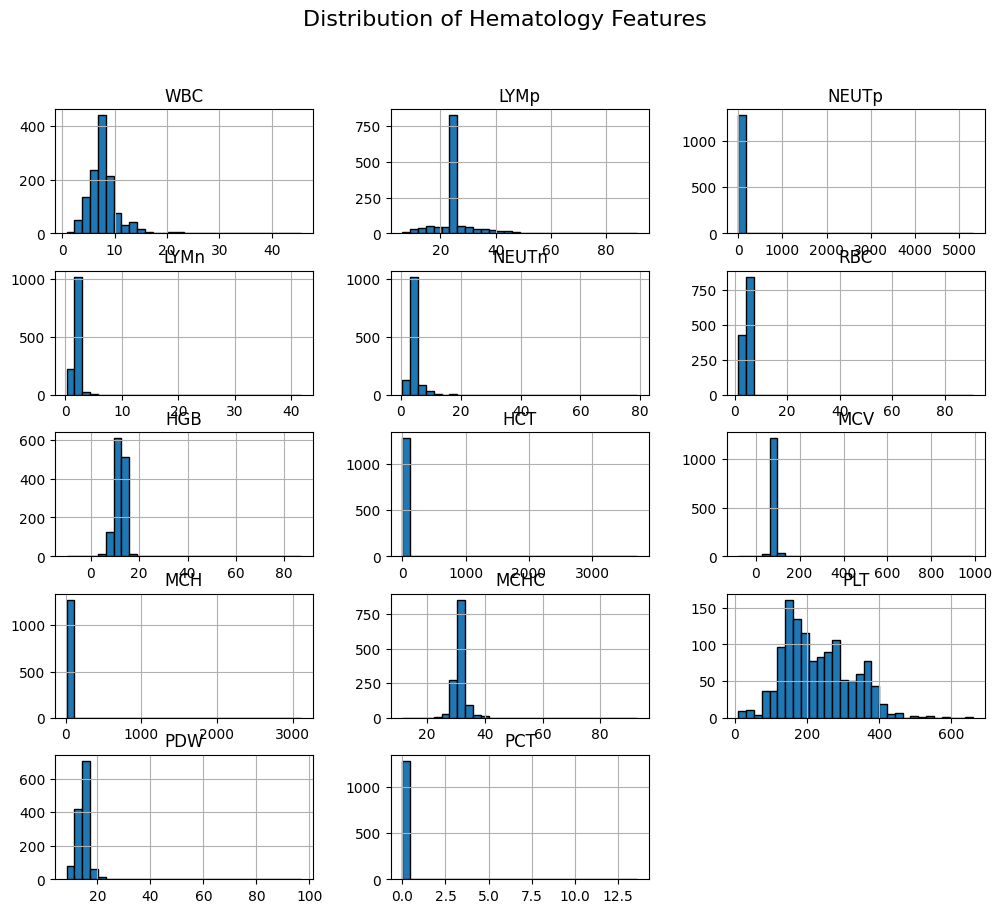

In [11]:
# Distribution of Numeric Features

plt.figure(figsize=(12, 6))
df.hist(figsize=(12, 10), bins=30, edgecolor='black', layout=(5, 3))
plt.suptitle('Distribution of Hematology Features', fontsize=16)
plt.show()

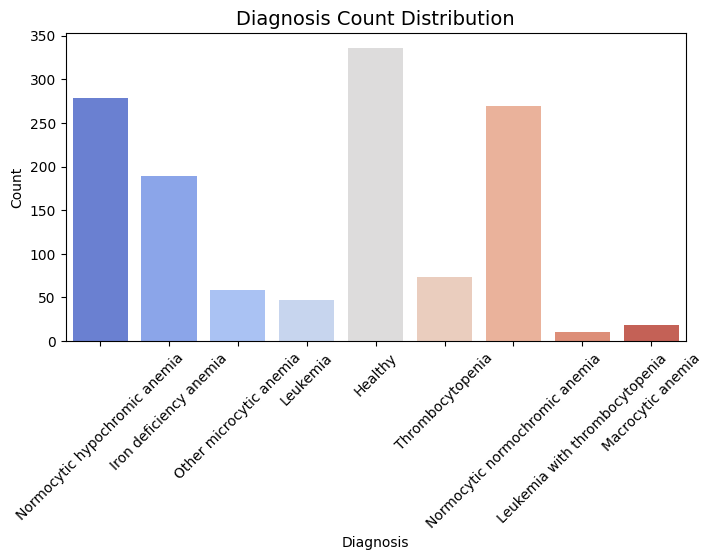

In [12]:
# Count of Diagnoses (Target Variable)

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Diagnosis', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Diagnosis Count Distribution', fontsize=14)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

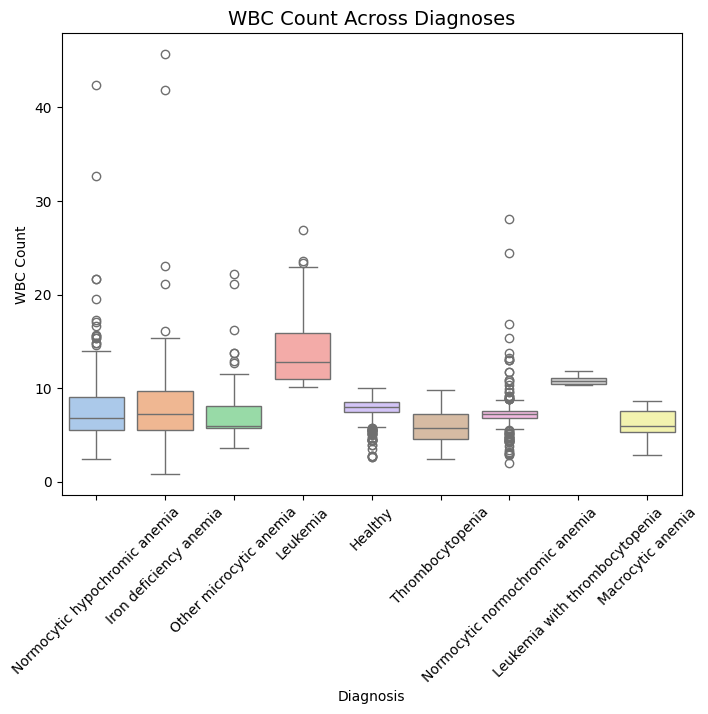

In [13]:
# Boxplot for WBC Across Diagnoses

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Diagnosis', y='WBC', palette='pastel')
plt.xticks(rotation=45)
plt.title('WBC Count Across Diagnoses', fontsize=14)
plt.xlabel('Diagnosis')
plt.ylabel('WBC Count')
plt.show()

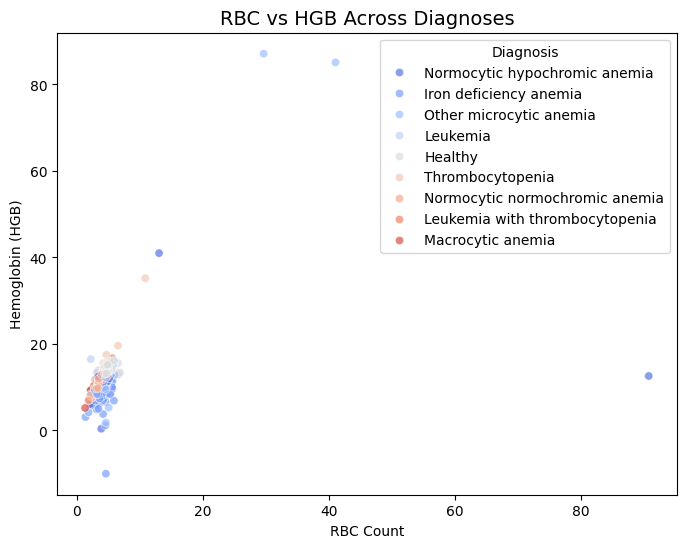

In [15]:
# Scatterplot of RBC vs. HGB by Diagnosis

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='RBC', y='HGB', hue='Diagnosis', palette='coolwarm', alpha=0.7)
plt.title('RBC vs HGB Across Diagnoses', fontsize=14)
plt.xlabel('RBC Count')
plt.ylabel('Hemoglobin (HGB)')
plt.legend(title='Diagnosis')
plt.show()

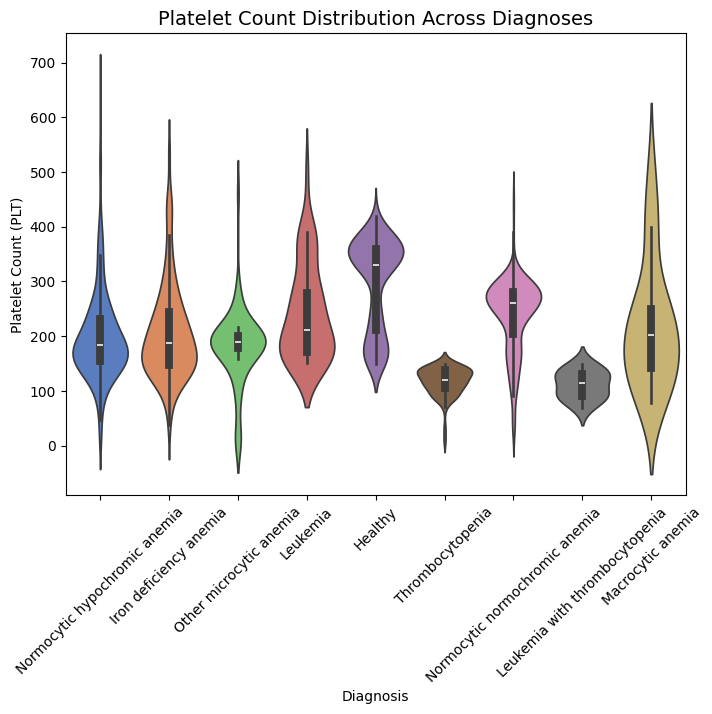

In [16]:
# Violin Plot for Platelet Count (PLT) vs. Diagnosis

plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Diagnosis', y='PLT', palette='muted')
plt.xticks(rotation=45)
plt.title('Platelet Count Distribution Across Diagnoses', fontsize=14)
plt.xlabel('Diagnosis')
plt.ylabel('Platelet Count (PLT)')
plt.show()

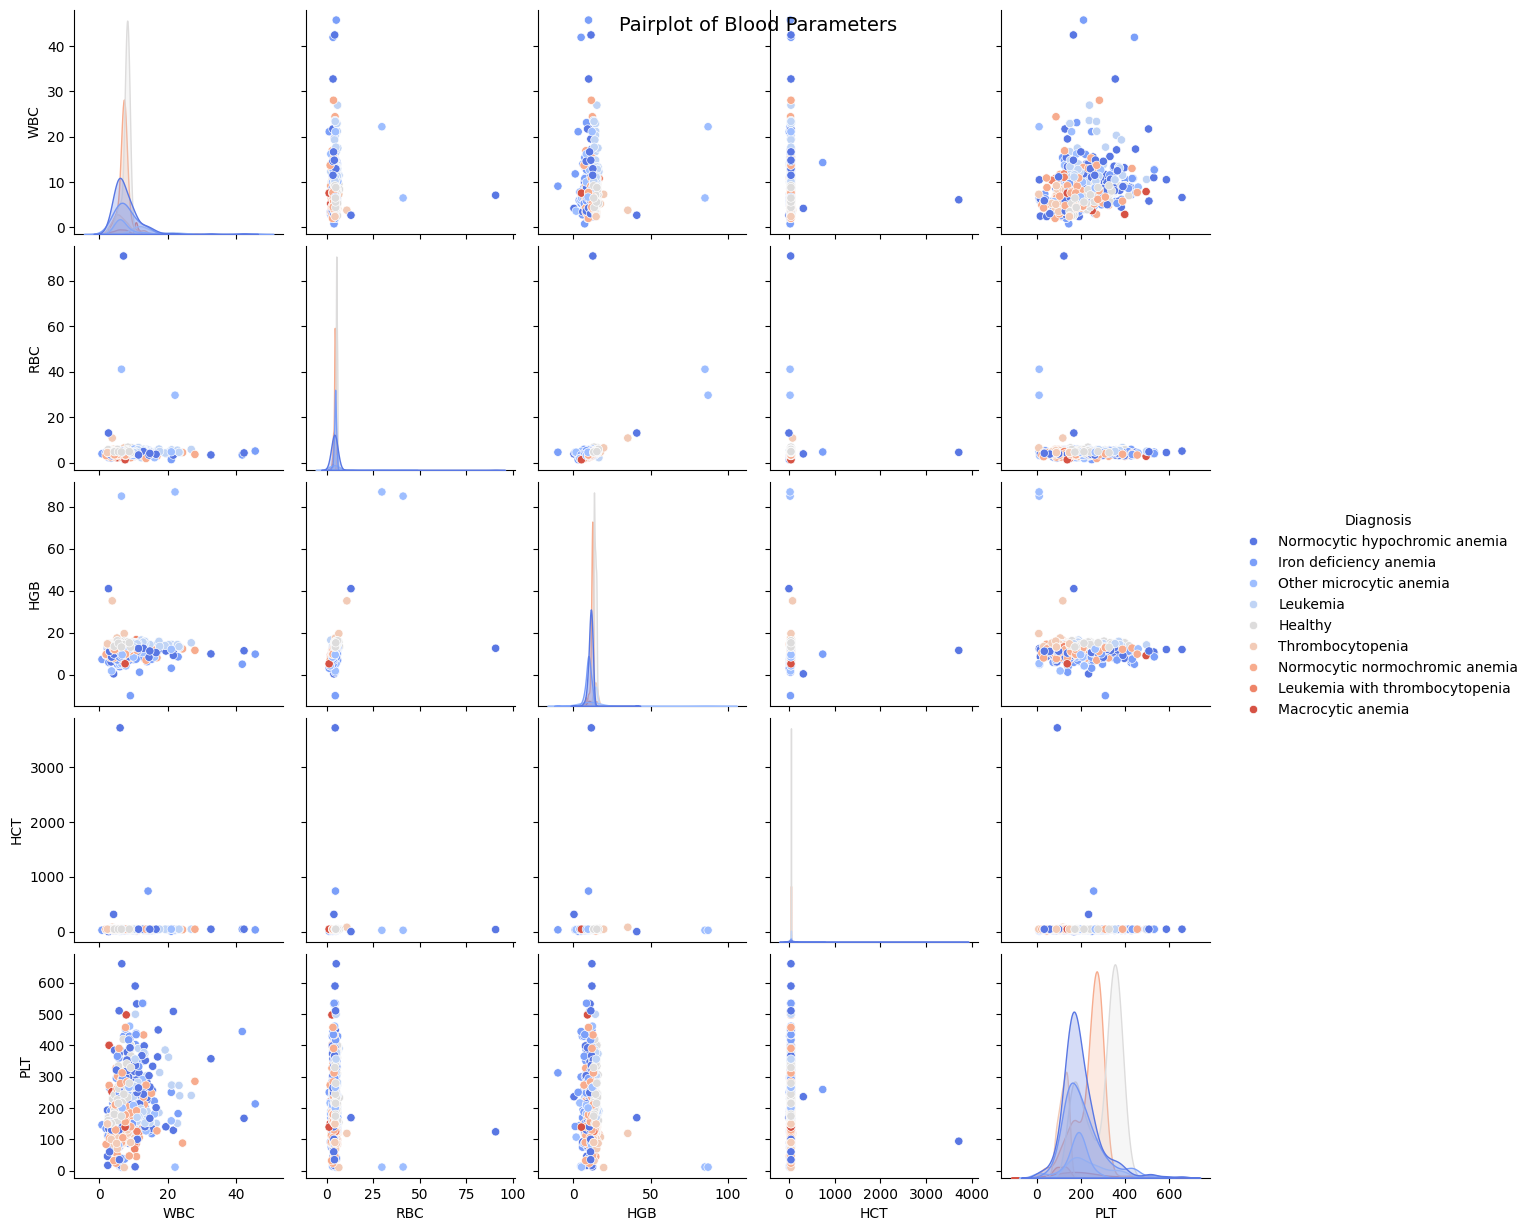

In [17]:
# Pairplot of Important Blood Parameters

sns.pairplot(df, vars=['WBC', 'RBC', 'HGB', 'HCT', 'PLT'], hue='Diagnosis', palette='coolwarm')
plt.suptitle('Pairplot of Blood Parameters', fontsize=14)
plt.show()

## Data Preprocessing

In [18]:
# Dropping Duplicated Values

df.drop_duplicates()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


In [19]:
X = df.drop('Diagnosis',axis=1)
y = df['Diagnosis']

In [20]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_label = label_encoder.fit_transform(y)

In [21]:
y_label

array([5, 5, 1, ..., 0, 0, 0])

In [23]:
# Train test and split

from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y_label,test_size =0.2,random_state =43)

## Model Building

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=10)),
    ('gbdt',GradientBoostingClassifier())
]

In [26]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=10
)

In [27]:
clf.fit(X_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [28]:
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9844357976653697